170498071/170498071 [==============================] - 2s 0us/step
Epoch 1/10
1563/1563 [==============================] - 89s 52ms/step - loss: 1.5624 - accuracy: 0.4330 - val_loss: 1.2972 - val_accuracy: 0.5305
Epoch 2/10
1563/1563 [==============================] - 87s 56ms/step - loss: 1.2051 - accuracy: 0.5702 - val_loss: 1.1663 - val_accuracy: 0.5870
Epoch 3/10
1563/1563 [==============================] - 90s 58ms/step - loss: 1.0589 - accuracy: 0.6247 - val_loss: 1.0149 - val_accuracy: 0.6458
Epoch 4/10
1563/1563 [==============================] - 82s 53ms/step - loss: 0.9582 - accuracy: 0.6617 - val_loss: 0.9730 - val_accuracy: 0.6601
Epoch 5/10
1563/1563 [==============================] - 83s 53ms/step - loss: 0.8862 - accuracy: 0.6866 - val_loss: 0.9242 - val_accuracy: 0.6787
Epoch 6/10
1563/1563 [==============================] - 91s 58ms/step - loss: 0.8249 - accuracy: 0.7108 - val_loss: 0.9064 - val_accuracy: 0.6861
Epoch 7/10
1563/1563 [==============================] - 8

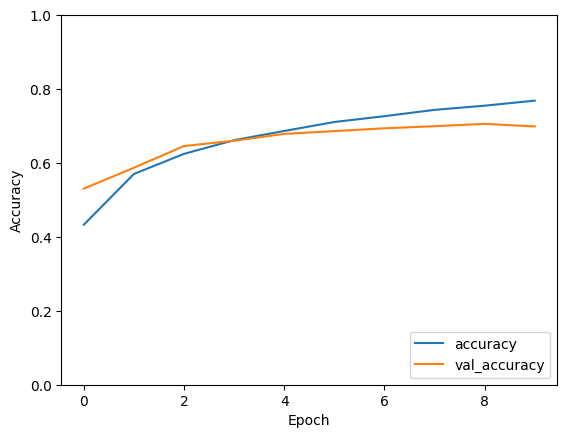

313/313 - 5s - loss: 0.9026 - accuracy: 0.6988 - 5s/epoch - 17ms/step

Test accuracy: 0.6988000273704529


In [1]:
# Import necessary libraries
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt

# Load and preprocess the CIFAR-10 dataset
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()
train_images, test_images = train_images / 255.0, test_images / 255.0

# Define the CNN model architecture
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10)
])

# Compile the model
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

# Train the model
history = model.fit(train_images, train_labels, epochs=10,
                    validation_data=(test_images, test_labels))

# Plot training and validation accuracy
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')
plt.show()

# Evaluate the model on the test dataset
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)
print('\nTest accuracy:', test_acc)
